In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


# Read and Explore Data

In [87]:
train_df = pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")
test_df = pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")

In [88]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [89]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [90]:
train_df = train_df.drop('Unnamed: 0', axis=1)
train_df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [91]:
test_df = test_df.drop('Unnamed: 0', axis=1)
test_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [92]:
train_df.shape

(1296675, 22)

In [93]:
test_df.shape

(555719, 22)

In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [95]:
train_df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [96]:
#number of is_fraud 
train_df["is_fraud"].sum()

7506

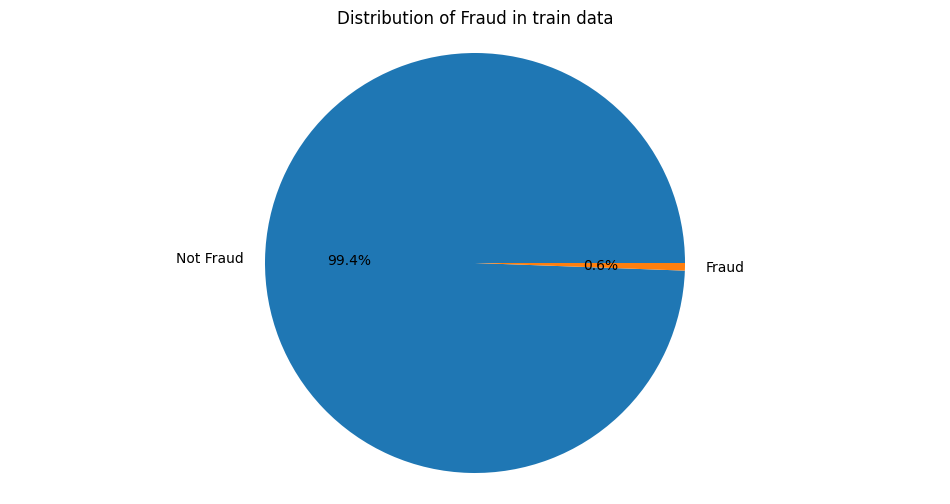

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
labels = ["Not Fraud","Fraud"]
values = train_df.is_fraud.value_counts()
plt.pie(values,labels = labels,autopct = "%1.1f%%",startangle = 0)
plt.title("Distribution of Fraud in train data")
plt.axis("equal")
plt.show()

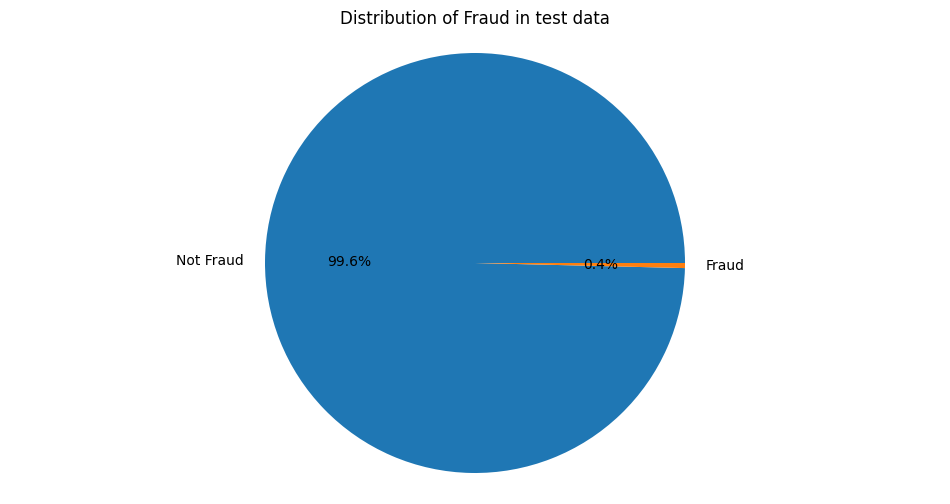

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
labels = ["Not Fraud","Fraud"]
values = test_df.is_fraud.value_counts()
plt.pie(values,labels = labels,autopct = "%1.1f%%",startangle = 0)
plt.title("Distribution of Fraud in test data")
plt.axis("equal")
plt.show()

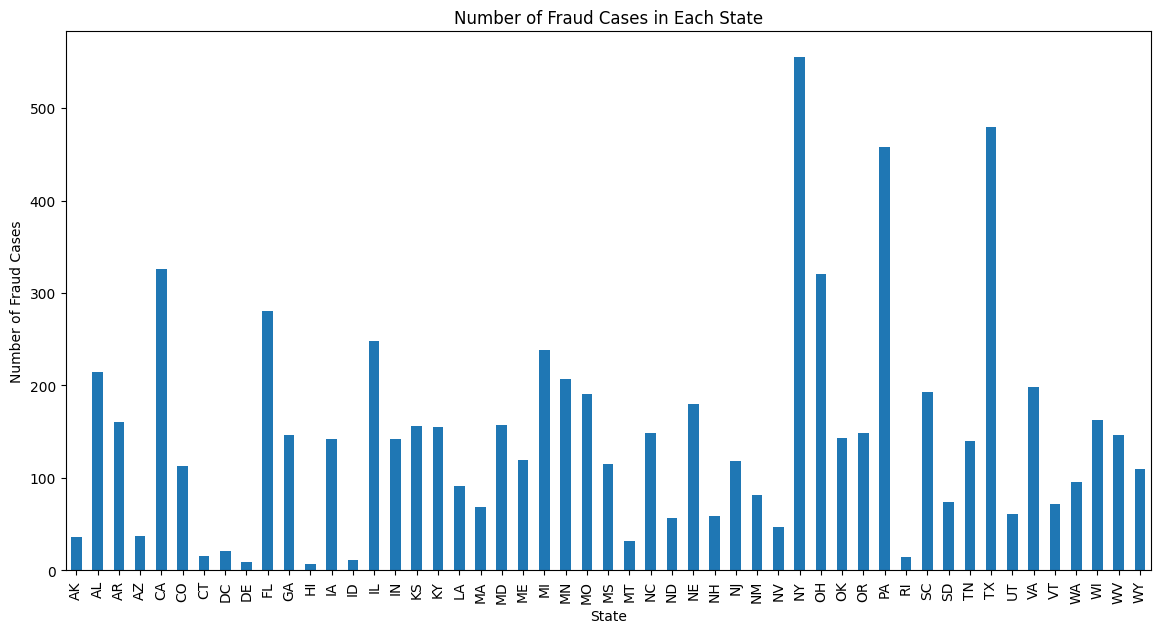

In [99]:
fraud_cases = train_df[train_df['is_fraud'] == 1]

fraud_by_state = fraud_cases['state'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
fraud_by_state.plot(kind='bar')
plt.title('Number of Fraud Cases in Each State')
plt.xlabel('State')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=90) 
plt.show()

# Drop unusefull columns 


In [100]:
train_df.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [101]:
def drop_cols(df):
    df = df.drop(columns = ['gender','street','city','zip','dob','trans_num','trans_date_trans_time','unix_time','merch_lat','merch_long'])
    return df


In [102]:
train_df = drop_cols(train_df)
train_df.head()

,cc_num,merchant,category,amt,first,last,state,lat,long,city_pop,job,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,NC,36.0788,-81.1781,3495,"Psychologist, counselling",0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,WA,48.8878,-118.2105,149,Special educational needs teacher,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,ID,42.1808,-112.2620,4154,Nature conservation officer,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,MT,46.2306,-112.1138,1939,Patent attorney,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,VA,38.4207,-79.4629,99,Dance movement psychotherapist,0


In [103]:
test_df = drop_cols(test_df)
test_df.head()

,cc_num,merchant,category,amt,first,last,state,lat,long,city_pop,job,is_fraud
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,SC,33.9659,-80.9355,333497,Mechanical engineer,0
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,UT,40.3207,-110.4360,302,"Sales professional, IT",0
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,NY,40.6729,-73.5365,34496,"Librarian, public",0
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,FL,28.5697,-80.8191,54767,Set designer,0
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,MI,44.2529,-85.0170,1126,Furniture designer,0


# Data Encoding

In [108]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
def encode_df(df):
    df['merchant'] = label_encoder.fit_transform(df['merchant'])
    df['category'] = label_encoder.fit_transform(df['category'])
    df['first'] = label_encoder.fit_transform(df['first'])
    df['last'] = label_encoder.fit_transform(df['last'])
    df['state'] = label_encoder.fit_transform(df['state'])
    df['job'] = label_encoder.fit_transform(df['job'])
    
    return df

train_df = encode_df(train_df)
test_df = encode_df(test_df)
train_df.head()


,cc_num,merchant,category,amt,first,last,state,lat,long,city_pop,job,is_fraud
0,2703186189652095,514,8,4.97,162,18,27,36.0788,-81.1781,3495,370,0
1,630423337322,241,4,107.23,309,157,47,48.8878,-118.2105,149,428,0
2,38859492057661,390,0,220.11,115,381,13,42.1808,-112.2620,4154,307,0
3,3534093764340240,360,2,45.00,163,463,26,46.2306,-112.1138,1939,328,0
4,375534208663984,297,9,41.96,336,149,45,38.4207,-79.4629,99,116,0


# Correlation Matrix 

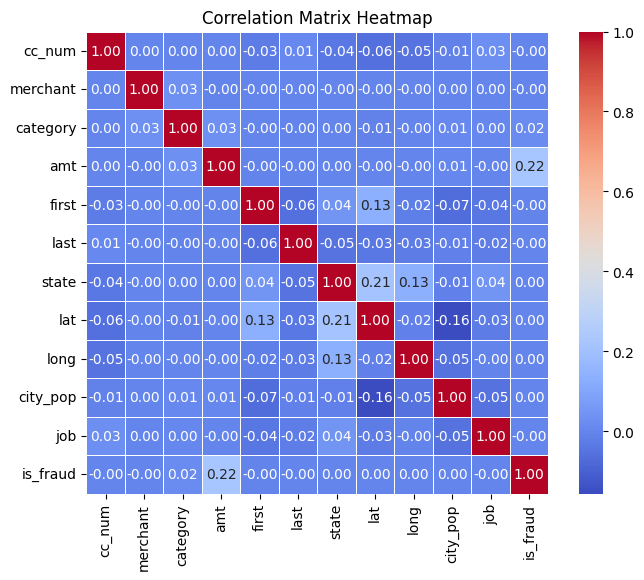

In [113]:
import seaborn as sns

corr_matrix = train_df.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar=True)

plt.title('Correlation Matrix Heatmap')

plt.show()

In [116]:
corr_matrix['is_fraud'].applysort_values(ascending=False)

is_fraud    1.000000
amt         0.219404
category    0.020205
city_pop    0.002136
lat         0.001894
state       0.001730
long        0.001721
job        -0.000093
last       -0.000096
merchant   -0.000536
cc_num     -0.000981
first      -0.003219
Name: is_fraud, dtype: float64

# Split Data

In [123]:
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

In [124]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1296675, 11)
(1296675,)
(555719, 11)
(555719,)


# Training with different models

In [125]:
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate(classifier, X_train, y_train, X_test, y_test):
    # Train
    model = classifier.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    #accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # report
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


classifiers = {
    'Log Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [128]:
results = {}

In [129]:
name = 'Log Regression'
clf =  classifiers[name]
accuracy, report = train_and_evaluate(clf, X_train, y_train, X_test, y_test )
results[name] = {
    'accuracy': accuracy,
    'report': report
}
print(f"Results for {name}:")
print(f"Accuracy: {results[name]['accuracy']}")
print(f"Classification Report:\n{results[name]['report']}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results for Log Regression:
Accuracy: 0.9961401355721147
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
name = 'KNN'
clf =  classifiers[name]
accuracy, report = train_and_evaluate(clf, X_train, y_train, X_test, y_test )
results[name] = {
    'accuracy': accuracy,
    'report': report
}
print(f"Results for {name}:")
print(f"Accuracy: {results[name]['accuracy']}")
print(f"Classification Report:\n{results[name]['report']}")

Results for KNN:
Accuracy: 0.9952547960390054
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.07      0.02      0.03      2145

    accuracy                           1.00    555719
   macro avg       0.53      0.51      0.51    555719
weighted avg       0.99      1.00      0.99    555719



In [132]:
name = 'Random Forest'
clf =  classifiers[name]
accuracy, report = train_and_evaluate(clf, X_train, y_train, X_test, y_test )
results[name] = {
    'accuracy': accuracy,
    'report': report
}
print(f"Results for {name}:")
print(f"Accuracy: {results[name]['accuracy']}")
print(f"Classification Report:\n{results[name]['report']}")

Results for Random Forest:
Accuracy: 0.997538324225013
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.75      0.54      0.63      2145

    accuracy                           1.00    555719
   macro avg       0.87      0.77      0.81    555719
weighted avg       1.00      1.00      1.00    555719



# Coclusion
### Random forest seems to be more efficient in this case